## Title : ScreenSense:Kids’ Screentime Visualization
### Project Statement 
Analyze kids’ screentime patterns to uncover trends by age, gender, location type 
(urban/rural), device type, day-of-week, and activity category using data visualization. The 
goal is to present clear, actionable insights for parents, educators, and policymakers.  
### Expected Outcomes 
- Understand and preprocess the screentime dataset for analysis
- Explore trends across weekdays/weekends, devices, and activities 
- Visualize key metrics using bar charts, distributions, heatmaps, and comparisons 
- Summarize insights for non-technical stakeholders via a visual report/dashboard 
- Provide a final presentation with the key findings and visuals

### WEEK - 1

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('Indian_Kids_Screen_Time.csv')
df

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban
...,...,...,...,...,...,...,...,...
9707,17,Male,3.26,Smartphone,True,0.44,Poor Sleep,Urban
9708,17,Female,4.43,Smartphone,True,0.40,Poor Sleep,Rural
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,Urban


In [45]:
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [47]:
df.columns.tolist()

['Age',
 'Gender',
 'Avg_Daily_Screen_Time_hr',
 'Primary_Device',
 'Exceeded_Recommended_Limit',
 'Educational_to_Recreational_Ratio',
 'Health_Impacts',
 'Urban_or_Rural']

In [49]:
df.shape

(9712, 8)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [53]:
df.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

In [55]:
df.describe()

,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9712.000000,9712.000000,9712.000000
mean,12.979201,4.352837,0.427226
std,3.162437,1.718232,0.073221
min,8.000000,0.000000,0.300000
25%,10.000000,3.410000,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


In [57]:
df.describe(include='O')

,Gender,Primary_Device,Health_Impacts,Urban_or_Rural
count,9712,9712,6494,9712
unique,2,4,15,2
top,Male,Smartphone,Poor Sleep,Urban
freq,4942,4568,2268,6851


In [59]:
df.Health_Impacts.unique()

array(['Poor Sleep, Eye Strain', 'Poor Sleep', nan, 'Poor Sleep, Anxiety',
       'Poor Sleep, Obesity Risk', 'Eye Strain', 'Obesity Risk',
       'Anxiety', 'Poor Sleep, Anxiety, Obesity Risk',
       'Eye Strain, Obesity Risk', 'Eye Strain, Anxiety, Obesity Risk',
       'Anxiety, Obesity Risk', 'Poor Sleep, Eye Strain, Obesity Risk',
       'Poor Sleep, Eye Strain, Anxiety',
       'Poor Sleep, Eye Strain, Anxiety, Obesity Risk',
       'Eye Strain, Anxiety'], dtype=object)

In [61]:
df.duplicated().sum()

44

In [63]:
df.isnull().sum() / len(df) * 100

Age                                   0.000000
Gender                                0.000000
Avg_Daily_Screen_Time_hr              0.000000
Primary_Device                        0.000000
Exceeded_Recommended_Limit            0.000000
Educational_to_Recreational_Ratio     0.000000
Health_Impacts                       33.134267
Urban_or_Rural                        0.000000
dtype: float64

In [31]:
df['Exceeded_Recommended_Limit'].value_counts()

Exceeded_Recommended_Limit
True     8301
False    1411
Name: count, dtype: int64

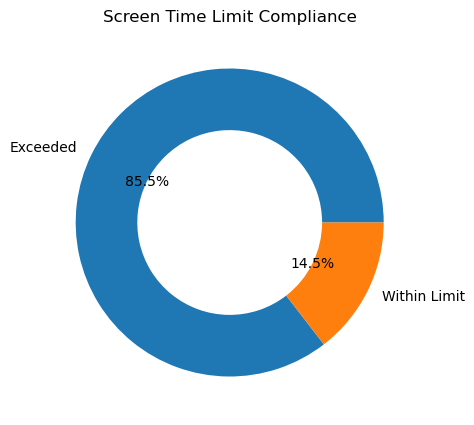

In [65]:
counts = df['Exceeded_Recommended_Limit'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(
    counts,
    labels=["Exceeded", "Within Limit"],
    autopct="%1.1f%%",
    wedgeprops=dict(width=0.4)
)
plt.title("Screen Time Limit Compliance")
plt.show()



**Insight:**
- ~85% children exceed recommended daily screentime limits, it indicates that widespread overexposure to digital devices among Indian kids.

In [67]:
df['Gender'].value_counts()

Gender
Male      4942
Female    4770
Name: count, dtype: int64

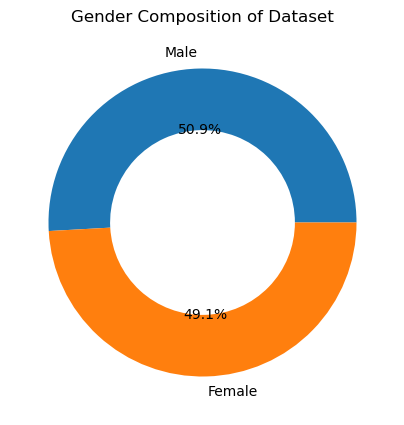

In [69]:
counts = df['Gender'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(
    counts,
    labels=counts.index,
    autopct="%1.1f%%",
    wedgeprops=dict(width=0.4)
)

plt.title("Gender Composition of Dataset")
plt.show()

**Insight:**
- The dataset has almost equal numbers of boys and girls, so results are not biased toward one gender.

In [77]:
df['Primary_Device'].value_counts()

Primary_Device
Smartphone    4568
TV            2487
Laptop        1433
Tablet        1224
Name: count, dtype: int64

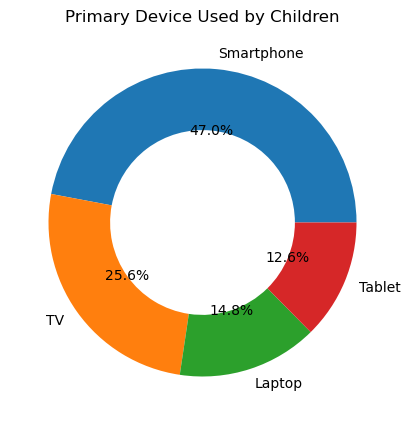

In [79]:
counts = df['Primary_Device'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(
    counts,
    labels=counts.index,
    autopct="%1.1f%%",
    wedgeprops=dict(width=0.4)
)
plt.title("Primary Device Used by Children")
plt.show()

**Insight:**
- Smartphones are the most commonly used devices among children, followed by TV, laptop, and tablet.

In [82]:
df['Urban_or_Rural'].value_counts()

Urban_or_Rural
Urban    6851
Rural    2861
Name: count, dtype: int64

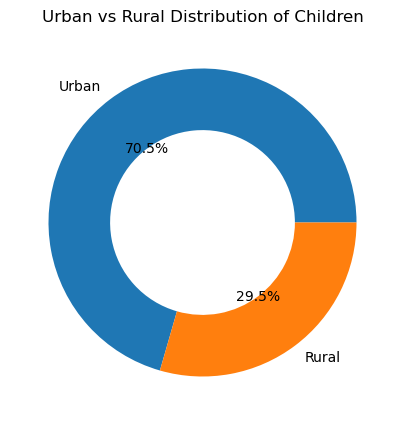

In [84]:
counts = df['Urban_or_Rural'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(
    counts,
    labels=counts.index,
    autopct="%1.1f%%",
    wedgeprops=dict(width=0.4)
)
plt.title("Urban vs Rural Distribution of Children")
plt.show()

**Insight:**
- Most children in the dataset are from urban areas (about 70%), while around 30% are from rural areas. This means the analysis may reflect urban children’s screentime patterns more strongly than rural children’s.

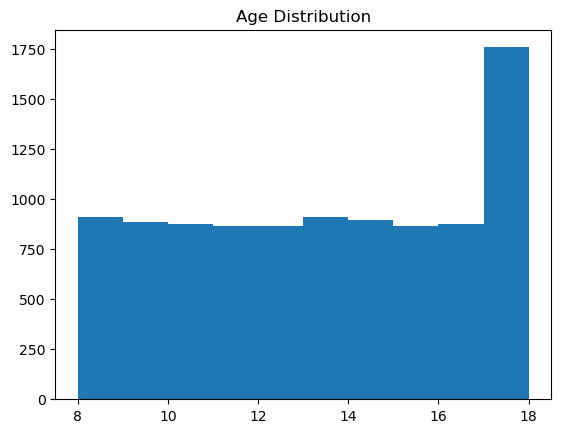

In [90]:
plt.hist(df['Age'], bins=10)
plt.title("Age Distribution")
plt.show()

**Insight:**
- The dataset includes children across ages 8 to 18, with a slightly higher number of older children (16–18 years). 
- This helps us study how screentime changes as children grow older.

**Dataset Summary as of week 1:**
- 9712 records, 8 features
- 33% missing in Health_Impacts
- Majority exceed screen limits
- Urban dominant sample
- Gender balanced
